In [1]:
#import sqlalchemy
import sqlalchemy as sqa
from sqlalchemy.orm import declarative_base
from sqlalchemy import func
from sqlalchemy import ForeignKey
from sqlalchemy.orm import relationship
from sqlalchemy import case

import timeit #for timing
import matplotlib.pyplot as plt
import numpy as np

from sqlalchemy.orm import sessionmaker

C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Raphael\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#creates engine to the database file
engine = sqa.create_engine("sqlite:///Data/movie.db")

In [3]:
#creates declarative base
Base = declarative_base()

In [4]:
#creates class for communicating with the movie table
class Movies(Base):
    __tablename__ = 'movies'
    
    id_movie = sqa.Column(sqa.Integer, primary_key=True)
    title_movie = sqa.Column(sqa.String)
    year_movie = sqa.Column(sqa.Integer)
    
    def __repr__(self):
        return "<Movie(id_movie='%i',title_movie='%s')>" % (self.id_movie, self.title_movie)

#creates class for communicating with the movie table
class Ratings(Base):
    __tablename__ = 'ratings'
    
    id_rating = sqa.Column(sqa.Integer, primary_key=True)
    id_movie = sqa.Column(sqa.Integer)
    id_user = sqa.Column(sqa.Integer)
    value_rating = sqa.Column(sqa.Float)
    timestamp_rating = sqa.Column(sqa.String)

    
    def __repr__(self):
        return "<Rating(id_rating='%i',id_movie='%i',id_user='%i',value_rating='%i',timestamp_rating='%s')>" % (self.id_rating,self.id_movie,self.id_user,self.value_rating, self.timestamp_rating)

#creates class for communicating with the movie table
class GenreList(Base):
    __tablename__ = 'genre_list'
    
    id_genre_item = sqa.Column(sqa.Integer, primary_key=True)
    id_movie = sqa.Column(sqa.Integer)
    name_genre = sqa.Column(sqa.String)
    
    
    def __repr__(self):
        return "<GenreList(id_genre_item='%i',id_movie='%i',name_genre='%s')>" % (self.id_genre_item,self.id_movie,self.id_user,self.name_genre)

    
#creates class temporary reference of average rating
class ReferenceRatings(Base):
    __tablename__ = 'reference_ratings'
    
    id_reference = sqa.Column(sqa.Integer, primary_key=True)
    average_rating = sqa.Column(sqa.Float)
    timestamp_update = sqa.Column(sqa.String)
    onestar_rating = sqa.Column(sqa.Integer)
    twostar_rating = sqa.Column(sqa.Integer)
    threestar_rating = sqa.Column(sqa.Integer)
    fourstar_rating = sqa.Column(sqa.Integer)
    fivestar_rating = sqa.Column(sqa.Integer)
    count_rating = sqa.Column(sqa.Integer)
    

    
    def __repr__(self):
        return "<Rating(id_movie='%i',average_rating='%i',timestamp_update='%s')>" % (self.id_reference,self.average_rating, self.timestamp_update)

#relationships

#Ratings.movie = relationship("Movies", back_populates="ratings")
#Movies.ratings = relationship("Ratings", order_by=Ratings.id_rating, back_populates="movie")

In [5]:
#connects to the database
Session = sessionmaker(bind=engine)
session = Session()

In [6]:
for m in session.query(Movies).order_by(Movies.id_movie)[1:30]:
    print(m.title_movie)

Jumanji
Grumpier Old Men
Waiting to Exhale
Father of the Bride Part II
Heat
Sabrina
Tom and Huck
Sudden Death
GoldenEye
American President, The
Dracula: Dead and Loving It
Balto
Nixon
Cutthroat Island
Casino
Sense and Sensibility
Four Rooms
Ace Ventura: When Nature Calls
Money Train
Get Shorty
Copycat
Assassins
Powder
Leaving Las Vegas
Othello
Now and Then
Persuasion
City of Lost Children, The (Cité des enfants perdus, La)
Shanghai Triad (Yao a yao yao dao waipo qiao)


In [7]:
start = timeit.default_timer()
for m in (session.query(Movies).filter(Movies.title_movie.like("%Jumanji%Welcome%"))[0:30]):
    print(m.title_movie)

stop = timeit.default_timer()

print('Time: ', stop - start) 

Jumanji: Welcome to the Jungle
Time:  0.06170710001606494


In [15]:
query = session.query(ReferenceRatings.id_reference, ReferenceRatings.average_rating, ReferenceRatings.count_rating)

In [62]:
query_arr = np.asarray(query[:])

In [63]:
query_arr[1]

array([1.00000000e+00, 3.89370779e+00, 5.73090000e+04])

In [89]:
sample_average = query_arr[:,1]
sample_counts = query_arr[:,2]

x = np.argsort(sample_average)
sample_average = np.sort(sample_average)
sample_counts = sample_counts[x]

In [90]:
sample_counts[5000]

0.0

In [91]:
sample[2]

array([3.25152716e+00, 2.42280000e+04])

In [92]:
sample = np.sort(sample)

(array([[2.09172e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.08420e+05, 4.73000e+02, 1.41000e+02, 6.50000e+01, 3.30000e+01,
         1.50000e+01, 1.20000e+01, 7.00000e+00, 2.00000e+00, 4.00000e+00]]),
 array([    0. ,  8149.1, 16298.2, 24447.3, 32596.4, 40745.5, 48894.6,
        57043.7, 65192.8, 73341.9, 81491. ]),
 <a list of 2 BarContainer objects>)

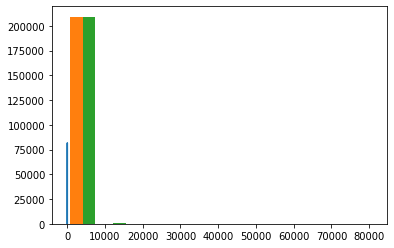

In [68]:
plt.plot(sample[:,0],sample[:,1])
plt.hist(sample)

In [113]:
start = timeit.default_timer() #start timer

max_movie = session.query(func.max(Movies.id_movie)).all()[0][0] + 1 #number of movies

aavg = np.zeros(max_movie)
acount = np.zeros(max_movie)
aone = np.zeros(max_movie)
atwo = np.zeros(max_movie)
athree = np.zeros(max_movie)
afour = np.zeros(max_movie)
afive = np.zeros(max_movie)

#queries for temporary information
one_star = session.query(Ratings.id_movie, func.count(Ratings.value_rating)).filter(Ratings.value_rating <= 1).group_by(Ratings.id_movie).order_by(Ratings.id_movie)
two_star = session.query(Ratings.id_movie, func.count(Ratings.value_rating)).filter(Ratings.value_rating <= 2, Ratings.value_rating > 1).group_by(Ratings.id_movie).order_by(Ratings.id_movie) 
three_star = session.query(Ratings.id_movie, func.count(Ratings.value_rating)).filter(Ratings.value_rating <= 3, Ratings.value_rating > 2).group_by(Ratings.id_movie).order_by(Ratings.id_movie)
four_star = session.query(Ratings.id_movie, func.count(Ratings.value_rating)).filter(Ratings.value_rating <= 4, Ratings.value_rating > 3).group_by(Ratings.id_movie).order_by(Ratings.id_movie)
five_star = session.query(Ratings.id_movie, func.count(Ratings.value_rating)).filter(Ratings.value_rating <= 5, Ratings.value_rating > 4).group_by(Ratings.id_movie).order_by(Ratings.id_movie)
average = session.query(Ratings.id_movie, func.avg(Ratings.value_rating), func.count(Ratings.value_rating)).group_by(Ratings.id_movie).order_by(Ratings.id_movie)


list_values = zip(average,one_star,two_star,three_star,four_star,five_star)

for item in list_values:
    aavg[item[0][0]] = item[0][1]
    acount[item[0][0]] = item[0][2]
    aone[item[1][0]] = item[1][1]
    atwo[item[2][0]] = item[2][1]
    athree[item[3][0]] = item[3][1]
    afour[item[4][0]] = item[4][1]
    afive[item[5][0]] = item[5][1]
    

stop = timeit.default_timer() #end timer

print('Time: ', stop - start) 

Time:  31.73702180001419


In [92]:
#create list for number of ratings and average

aavg = np.zeros

start = timeit.default_timer() #start timer

list_values = zip(average,one_star,two_star,three_star,four_star,five_star)

for item in list_values:
    #print("MovieID:" + str(item[0][0]) + " AVG:" + str(item[0][1]) + " COUNT:" + str(item[0][2]))
    id_1 = item[0][0]
    id_2 = item[1][0]
    id_3 = item[2][0]
    id_4 = item[3][0]
    id_5 = item[4][0]
    id_6 = item[5][0]

stop = timeit.default_timer() #end timer

print('Time: ', stop - start) 

OK
1
1
1
1
1
1
OK
2
2
2
2
2
2
OK
3
3
3
3
3
3
OK
4
4
4
4
4
4
OK
5
5
5
5
5
5
OK
6
6
6
6
6
6
OK
7
7
7
7
7
7
OK
8
8
8
8
8
8
OK
9
9
9
9
9
9
OK
10
10
10
10
10
10
OK
11
11
11
11
11
11
OK
12
12
12
12
12
12
OK
13
13
13
13
13
13
OK
14
14
14
14
14
14
OK
15
15
15
15
15
15
OK
16
16
16
16
16
16
OK
17
17
17
17
17
17
OK
18
18
18
18
18
18
OK
19
19
19
19
19
19
OK
20
20
20
20
20
20
OK
21
21
21
21
21
21
OK
22
22
22
22
22
22
OK
23
23
23
23
23
23
OK
24
24
24
24
24
24
OK
25
25
25
25
25
25
OK
26
26
26
26
26
26
OK
27
27
27
27
27
27
OK
28
28
28
28
28
28
OK
29
29
29
29
29
29
OK
30
30
30
30
30
30
OK
31
31
31
31
31
31
OK
32
32
32
32
32
32
OK
33
33
33
33
33
33
OK
34
34
34
34
34
34
OK
35
35
35
35
35
35
OK
36
36
36
36
36
36
OK
37
37
37
37
37
37
OK
38
38
38
38
38
38
OK
39
39
39
39
39
39
OK
40
40
40
40
40
40
OK
41
41
41
41
41
41
OK
42
42
42
42
42
42
OK
43
43
43
43
43
43
OK
44
44
44
44
44
44
OK
45
45
45
45
45
45
OK
46
46
46
46
46
46
OK
47
47
47
47
47
47
OK
48
48
48
48
48
48
OK
49
49
49
49
49
49
OK
50
50
50
50
50
50
OK
5

96071
111630
CRITICAL FAILURE!
91890
117863
110259
94074
96075
111647
CRITICAL FAILURE!
91894
117867
110273
94083
96079
111657
CRITICAL FAILURE!
91896
117871
110276
94101
96084
111659
CRITICAL FAILURE!
91902
117877
110281
94103
96096
111661
CRITICAL FAILURE!
91904
117881
110295
94107
96098
111663
CRITICAL FAILURE!
91906
117885
110297
94112
96110
111680
CRITICAL FAILURE!
91908
117887
110314
94122
96114
111691
CRITICAL FAILURE!
91911
117893
110316
94126
96121
111696
CRITICAL FAILURE!
91914
117895
110318
94128
96131
111704
CRITICAL FAILURE!
91919
117897
110320
94130
96150
111706
CRITICAL FAILURE!
91921
117899
110322
94142
96176
111732
CRITICAL FAILURE!
91924
117909
110324
94144
96179
111734
CRITICAL FAILURE!
91927
117911
110328
94146
96181
111743
CRITICAL FAILURE!
91929
117913
110339
94148
96195
111757
CRITICAL FAILURE!
91931
117922
110346
94155
96197
111759
CRITICAL FAILURE!
91933
117924
110350
94157
96212
111762
CRITICAL FAILURE!
91935
117928
110352
94184
96214
111766
CRITICAL FAILURE!


In [9]:
start = timeit.default_timer() #start timer

query = session.query(Movies.id_movie, ReferenceRatings.average_rating,).filter(Movies.id_movie == ReferenceRatings.id_reference).order_by(Movies.id_movie)[0:30]
print(query[:10])

stop = timeit.default_timer() #end timer

print('Time: ', stop - start) 

[(1, 3.893707794587238), (2, 3.2515271586594023), (3, 3.142028126058963), (4, 2.85354736424891), (5, 3.0584343520573674), (6, 3.854908898649748), (7, 3.3636663369601054), (8, 3.1145833333333335), (9, 2.992050660199407), (10, 3.42145763311516)]
Time:  0.0017033999902196229


In [37]:
start = timeit.default_timer() #start timer
for m in session.query(Movies.title_movie, Movies.year_movie,ReferenceRatings.average_rating).filter(Movies.id_movie == ReferenceRatings.id_reference).order_by(Movies.id_movie)[0:30]:
    print(m)
stop = timeit.default_timer() #end timer

print('Time: ', stop - start) 

('Toy Story', 1995, 3.893707794587238)
('Jumanji', 1995, 3.2515271586594023)
('Grumpier Old Men', 1995, 3.142028126058963)
('Waiting to Exhale', 1995, 2.85354736424891)
('Father of the Bride Part II', 1995, 3.0584343520573674)
('Heat', 1995, 3.854908898649748)
('Sabrina', 1995, 3.3636663369601054)
('Tom and Huck', 1995, 3.1145833333333335)
('Sudden Death', 1995, 2.992050660199407)
('GoldenEye', 1995, 3.42145763311516)
('American President, The', 1995, 3.6571705198920315)
('Dracula: Dead and Loving It', 1995, 2.6245656241646618)
('Balto', 1995, 3.333527696793003)
('Nixon', 1995, 3.4234888364494465)
('Cutthroat Island', 1995, 2.7190217391304348)
('Casino', 1995, 3.8237068028689416)
('Sense and Sensibility', 1995, 3.948806325713417)
('Four Rooms', 1995, 3.3843505768515074)
('Ace Ventura: When Nature Calls', 1995, 2.6421677802524126)
('Money Train', 1995, 2.869921875)
('Get Shorty', 1995, 3.5701620505454055)
('Copycat', 1995, 3.3200173216412256)
('Assassins', 1995, 3.145691333982473)
('Pow

In [36]:
start = timeit.default_timer()
for m in (session.query(GenreList.name_genre.distinct())):
    print(m[0].strip('\n'))

stop = timeit.default_timer()

print('Time: ', stop - start) 

Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Comedy
Action
Crime
Thriller
Children
Action
Horror
Drama
Horror
Mystery
Sci-Fi
Fantasy
Sci-Fi
Romance
IMAX
Documentary
War
Musical
Mystery
Crime
Documentary
Musical
Thriller
Western
Film-Noir
War
Animation
Adventure
Film-Noir
Western
(no genres listed)
Time:  0.02149790001567453


In [118]:
start = timeit.default_timer()
genre_query = session.query(Movies.title_movie, Movies.year_movie,ReferenceRatings.average_rating, ReferenceRatings.count_rating, GenreList.id_movie, GenreList.name_genre).filter(Movies.id_movie == ReferenceRatings.id_reference, Movies.id_movie == GenreList.id_movie).order_by(ReferenceRatings.count_rating.desc())
genre_query = genre_query.filter(GenreList.name_genre == "Animation")
genre_query[0:10]
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.40986070001963526


In [119]:
genre_query[0:10]

[('Toy Story', 1995, 3.893707794587238, 57309, 1, 'Animation'),
 ('Aladdin', 1992, 3.6987526802388584, 43373, 588, 'Animation'),
 ('Lion King, The', 1994, 3.817136507193824, 42745, 364, 'Animation'),
 ('Shrek', 2001, 3.7548282627709617, 42303, 4306, 'Animation'),
 ('Beauty and the Beast', 1991, 3.6809198555552447, 35723, 595, 'Animation'),
 ('Finding Nemo', 2003, 3.8339767227471766, 34712, 6377, 'Animation'),
 ('Monsters, Inc.', 2001, 3.8486202707393264, 34572, 4886, 'Animation'),
 ('Incredibles, The', 2004, 3.854885151495321, 30562, 8961, 'Animation'),
 ('WALL·E', 2008, 4.004931687002265, 27374, 60069, 'Animation'),
 ('Toy Story 2', 1999, 3.8114636719927644, 26536, 3114, 'Animation')]